In [1]:
pip install openai tiktoken matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tiktoken

enc = tiktoken.encoding_for_model("gpt-4o-mini")

sample_text = "Agentic AI agents can plan, reason, and use tools."
tokens = enc.encode(sample_text)

print("Original text:", sample_text)
print("Number of tokens:", len(tokens))
print("Token IDs:", tokens)
print("Decoded tokens:", [enc.decode([t]) for t in tokens])

Original text: Agentic AI agents can plan, reason, and use tools.
Number of tokens: 13
Token IDs: [18086, 291, 20837, 19297, 665, 3496, 11, 5207, 11, 326, 1199, 8437, 13]
Decoded tokens: ['Agent', 'ic', ' AI', ' agents', ' can', ' plan', ',', ' reason', ',', ' and', ' use', ' tools', '.']


In [ ]:
sentences = [
    "AI is amazing.",
    "Artificial Intelligence is amazing.",
    "AI is 🔥."
]

for s in sentences:
    t = enc.encode(s)
    print(f"Text: {s}\nTokens: {len(t)} → {t}\n")

Text: AI is amazing.
Tokens: 4 → [17527, 382, 8467, 13]

Text: Artificial Intelligence is amazing.
Tokens: 5 → [186671, 42378, 382, 8467, 13]

Text: AI is 🔥.
Tokens: 5 → [17527, 382, 113718, 98, 13]



In [6]:
import os
from dotenv import load_dotenv
from openai import OpenAI
load_dotenv()

client = OpenAI()

texts = ["Agentic AI", "Autonomous agents", "Bananas are yellow"]

embeddings = []
for t in texts:
    resp = client.embeddings.create(
        model="text-embedding-3-small",
        input=t
    )
    vector = resp.data[0].embedding
    embeddings.append(vector)
    print(f"{t} → vector length {len(vector)}")

Agentic AI → vector length 1536
Autonomous agents → vector length 1536
Bananas are yellow → vector length 1536


In [7]:
# Test OpenAI API connection
import os
from dotenv import load_dotenv
from openai import OpenAI

# Load environment variables
load_dotenv()

# Check if API key is loaded
api_key = os.getenv("OPENAI_API_KEY")
if api_key:
    print("✅ API key loaded successfully!")
    print(f"Key starts with: {api_key[:10]}...")
else:
    print("❌ API key not found!")

# Initialize client
try:
    client = OpenAI()
    print("✅ OpenAI client initialized successfully!")
except Exception as e:
    print(f"❌ Error initializing client: {e}")


✅ API key loaded successfully!
Key starts with: sk-AC8eo23...
✅ OpenAI client initialized successfully!


In [8]:
# Now test the embeddings code that was failing
texts = ["Agentic AI", "Autonomous agents", "Bananas are yellow"]

embeddings = []
for t in texts:
    try:
        resp = client.embeddings.create(
            model="text-embedding-3-small",
            input=t
        )
        vector = resp.data[0].embedding
        embeddings.append(vector)
        print(f"✅ {t} → vector length {len(vector)}")
    except Exception as e:
        print(f"❌ Error processing '{t}': {e}")

print(f"\n🎉 Successfully created {len(embeddings)} embeddings!")


✅ Agentic AI → vector length 1536
✅ Autonomous agents → vector length 1536
✅ Bananas are yellow → vector length 1536

🎉 Successfully created 3 embeddings!


/Users/ganeshkanagavel/Library/CloudStorage/GoogleDrive-kganesk@gmail.com/My Drive/Ganesh/Learning/AIProjects/Project1-EDA/agentic_AI_py312/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/ganeshkanagavel/Library/CloudStorage/GoogleDrive-kganesk@gmail.com/My Drive/Ganesh/Learning/AIProjects/Project1-EDA/agentic_AI_py312/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/ganeshkanagavel/Library/CloudStorage/GoogleDrive-kganesk@gmail.com/My Drive/Ganesh/Learning/AIProjects/Project1-EDA/agentic_AI_py312/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/ganeshkanagavel/Library/CloudStorage/GoogleDrive-kganesk@gmail.com/My Drive/Ganesh/Learning/AIProjects/Project1-EDA/agentic_AI_py312/lib/python3.12/site-packages/s

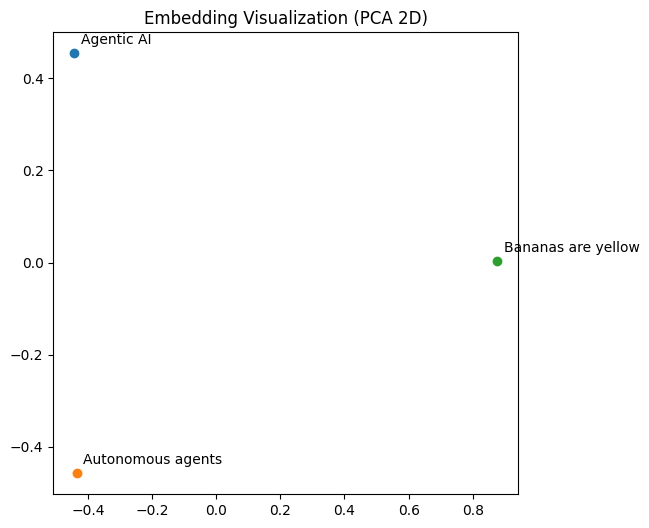

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
points = pca.fit_transform(embeddings)

plt.figure(figsize=(6,6))
for i, txt in enumerate(texts):
    plt.scatter(points[i,0], points[i,1])
    plt.text(points[i,0]+0.02, points[i,1]+0.02, txt)

plt.title("Embedding Visualization (PCA 2D)")
plt.show()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity([embeddings[0]], embeddings)
print("Similarity scores:", sim)

Similarity scores: [[1.         0.58413705 0.02984083]]


# 7. Mini-Project: Token & Embedding Explorer

## Objective
Create a comprehensive function that analyzes text by providing:
- **Tokenization**: Break down text into tokens
- **Embedding**: Generate vector representation
- **Similarity**: Compare against a reference text
- **Visualization**: Show clusters and relationships

## Step-by-Step Implementation


In [11]:
# Step 1: Import required libraries
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [12]:
# Step 2: Create the Token & Embedding Explorer Function
def token_embedding_explorer(sentence: str, reference_text: str = None, model_name: str = "gpt-4o-mini") -> Dict:
    """
    Comprehensive text analysis function that provides tokenization, embedding, and similarity analysis.

    Args:
        sentence (str): Input sentence to analyze
        reference_text (str): Reference text for similarity comparison (optional)
        model_name (str): Model name for tokenization

    Returns:
        Dict: Dictionary containing tokens, embedding, and similarity information
    """

    # Initialize tokenizer
    enc = tiktoken.encoding_for_model(model_name)

    # 1. TOKENIZATION ANALYSIS
    tokens = enc.encode(sentence)
    decoded_tokens = [enc.decode([t]) for t in tokens]

    token_info = {
        'original_text': sentence,
        'token_count': len(tokens),
        'token_ids': tokens,
        'decoded_tokens': decoded_tokens,
        'token_details': [{'id': tid, 'text': ttext} for tid, ttext in zip(tokens, decoded_tokens)]
    }

    # 2. EMBEDDING GENERATION
    try:
        response = client.embeddings.create(
            model="text-embedding-3-small",
            input=sentence
        )
        embedding = response.data[0].embedding
        embedding_info = {
            'embedding_vector': embedding,
            'embedding_dimension': len(embedding),
            'embedding_norm': np.linalg.norm(embedding)
        }
    except Exception as e:
        print(f"❌ Error generating embedding: {e}")
        embedding_info = {'error': str(e)}

    # 3. SIMILARITY ANALYSIS (if reference provided)
    similarity_info = {}
    if reference_text:
        try:
            # Get reference embedding
            ref_response = client.embeddings.create(
                model="text-embedding-3-small",
                input=reference_text
            )
            ref_embedding = ref_response.data[0].embedding

            # Calculate similarity
            similarity = cosine_similarity([embedding], [ref_embedding])[0][0]

            similarity_info = {
                'reference_text': reference_text,
                'similarity_score': float(similarity),
                'similarity_interpretation': interpret_similarity(similarity)
            }
        except Exception as e:
            similarity_info = {'error': str(e)}

    # 4. COMPREHENSIVE ANALYSIS
    analysis = {
        'tokenization': token_info,
        'embedding': embedding_info,
        'similarity': similarity_info,
        'summary': {
            'text_length': len(sentence),
            'token_efficiency': len(sentence) / len(tokens) if tokens else 0,
            'has_embedding': 'embedding_vector' in embedding_info,
            'has_similarity': 'similarity_score' in similarity_info
        }
    }

    return analysis

def interpret_similarity(score: float) -> str:
    """Interpret similarity score in human-readable terms."""
    if score >= 0.9:
        return "Very similar (almost identical meaning)"
    elif score >= 0.7:
        return "Similar (related concepts)"
    elif score >= 0.5:
        return "Moderately similar (some shared concepts)"
    elif score >= 0.3:
        return "Somewhat different (limited similarity)"
    else:
        return "Very different (unrelated concepts)"

print("✅ Token & Embedding Explorer function created!")


✅ Token & Embedding Explorer function created!


In [13]:
# Step 3: Test the function with a single sentence
print("🧪 Testing Token & Embedding Explorer with a single sentence...")
print("=" * 60)

# Test sentence
test_sentence = "Machine learning is transforming artificial intelligence."
reference = "AI and machine learning are revolutionizing technology."

# Analyze the sentence
result = token_embedding_explorer(test_sentence, reference)

# Display results
print(f"📝 Original Text: '{result['tokenization']['original_text']}'")
print(f"🔢 Token Count: {result['tokenization']['token_count']}")
print(f"🎯 Tokens: {result['tokenization']['decoded_tokens']}")
print(f"📊 Embedding Dimension: {result['embedding']['embedding_dimension']}")
print(f"📏 Embedding Norm: {result['embedding']['embedding_norm']:.4f}")

if 'similarity_score' in result['similarity']:
    print(f"🔗 Similarity Score: {result['similarity']['similarity_score']:.4f}")
    print(f"💭 Interpretation: {result['similarity']['similarity_interpretation']}")

print(f"⚡ Token Efficiency: {result['summary']['token_efficiency']:.2f} chars/token")
print("✅ Single sentence test completed!")


🧪 Testing Token & Embedding Explorer with a single sentence...
📝 Original Text: 'Machine learning is transforming artificial intelligence.'
🔢 Token Count: 7
🎯 Tokens: ['Machine', ' learning', ' is', ' transforming', ' artificial', ' intelligence', '.']
📊 Embedding Dimension: 1536
📏 Embedding Norm: 1.0000
🔗 Similarity Score: 0.7112
💭 Interpretation: Similar (related concepts)
⚡ Token Efficiency: 8.14 chars/token
✅ Single sentence test completed!


In [17]:
# Step 4: Test with multiple diverse sentences
print("🧪 Testing with multiple diverse sentences...")
print("=" * 60)

# Create diverse test sentences
test_sentences = [
    "Artificial intelligence is the future of technology.",
    "Cats are amazing pets that love to play.",
    "The weather today is sunny and warm.",
    "Machine learning algorithms can predict outcomes.",
    "I love eating pizza on weekends.",
    "Neural networks mimic the human brain.",
    "The ocean waves are beautiful at sunset.",
    "Deep learning requires large datasets.",
    "My favorite color is blue.",
    "Natural language processing helps computers understand text."
]

# Reference text for similarity comparison
reference_text = "Technology and artificial intelligence are advancing rapidly."

# Analyze all sentences
results = []
for i, sentence in enumerate(test_sentences, 1):
    print(f"📊 Analyzing sentence {i}/10: '{sentence[:50]}...'")
    result = token_embedding_explorer(sentence, reference_text)
    results.append(result)

print(f"\n✅ Successfully analyzed {len(results)} sentences!")
print("=" * 60)


🧪 Testing with multiple diverse sentences...
📊 Analyzing sentence 1/10: 'Artificial intelligence is the future of technolog...'
📊 Analyzing sentence 2/10: 'Cats are amazing pets that love to play....'
📊 Analyzing sentence 3/10: 'The weather today is sunny and warm....'
📊 Analyzing sentence 4/10: 'Machine learning algorithms can predict outcomes....'
📊 Analyzing sentence 5/10: 'I love eating pizza on weekends....'
📊 Analyzing sentence 6/10: 'Neural networks mimic the human brain....'
📊 Analyzing sentence 7/10: 'The ocean waves are beautiful at sunset....'
📊 Analyzing sentence 8/10: 'Deep learning requires large datasets....'
📊 Analyzing sentence 9/10: 'My favorite color is blue....'
📊 Analyzing sentence 10/10: 'Natural language processing helps computers unders...'

✅ Successfully analyzed 10 sentences!


In [19]:
# Step 5: Create comprehensive analysis and visualization
print("📊 Creating comprehensive analysis and visualizations...")
print("=" * 60)

# Extract data for analysis
sentences = [r['tokenization']['original_text'] for r in results]
token_counts = [r['tokenization']['token_count'] for r in results]
similarity_scores = [r['similarity']['similarity_score'] for r in results if 'similarity_score' in r['similarity']]
embeddings = [r['embedding']['embedding_vector'] for r in results if 'embedding_vector' in r['embedding']]

# Create summary DataFrame
summary_data = []
for i, result in enumerate(results):
    summary_data.append({
        'sentence': result['tokenization']['original_text'],
        'token_count': result['tokenization']['token_count'],
        'similarity_score': result['similarity'].get('similarity_score', 0),
        'embedding_norm': result['embedding'].get('embedding_norm', 0),
        'token_efficiency': result['summary']['token_efficiency']
    })

df = pd.DataFrame(summary_data)

print("📋 ANALYSIS SUMMARY:")
print("=" * 40)
print(f"Total sentences analyzed: {len(sentences)}")
print(f"Average token count: {np.mean(token_counts):.2f}")
print(f"Average similarity score: {np.mean(similarity_scores):.4f}")
print(f"Token count range: {min(token_counts)} - {max(token_counts)}")
print(f"Similarity range: {min(similarity_scores):.4f} - {max(similarity_scores):.4f}")

print("\n🔝 TOP 3 MOST SIMILAR TO REFERENCE:")
top_similar = df.nlargest(3, 'similarity_score')
for i, row in top_similar.iterrows():
    print(f"  {row['similarity_score']:.4f}: {row['sentence']}")

print("\n🔝 TOP 3 LEAST SIMILAR TO REFERENCE:")
least_similar = df.nsmallest(3, 'similarity_score')
for i, row in least_similar.iterrows():
    print(f"  {row['similarity_score']:.4f}: {row['sentence']}")

print("✅ Analysis completed!")


📊 Creating comprehensive analysis and visualizations...
📋 ANALYSIS SUMMARY:
Total sentences analyzed: 10
Average token count: 7.50
Average similarity score: 0.2491
Token count range: 6 - 9
Similarity range: 0.0404 - 0.7249

🔝 TOP 3 MOST SIMILAR TO REFERENCE:
  0.7249: Artificial intelligence is the future of technology.
  0.4020: Machine learning algorithms can predict outcomes.
  0.3235: Deep learning requires large datasets.

🔝 TOP 3 LEAST SIMILAR TO REFERENCE:
  0.0404: The ocean waves are beautiful at sunset.
  0.0469: My favorite color is blue.
  0.0530: I love eating pizza on weekends.
✅ Analysis completed!


🎨 Creating cluster visualization...


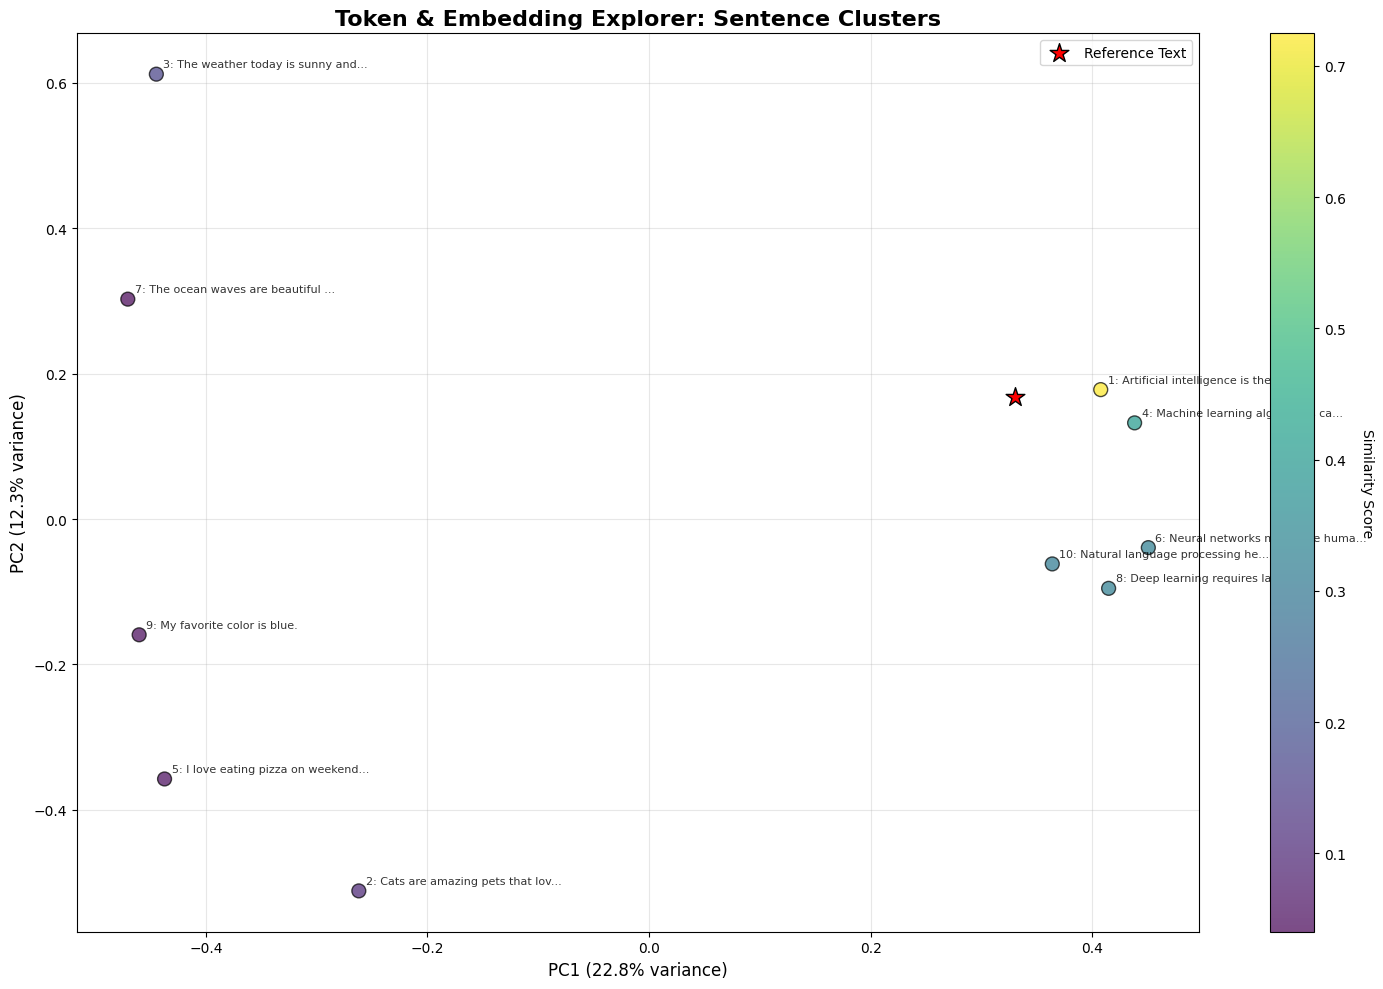

📊 PCA explained variance: PC1=22.8%, PC2=12.3%
✅ Cluster visualization completed!


In [20]:
# Step 6: Create cluster visualization
print("🎨 Creating cluster visualization...")

# Create PCA for 2D visualization
if len(embeddings) > 1:
    pca = PCA(n_components=2)
    embedding_2d = pca.fit_transform(embeddings)

    # Create the visualization
    plt.figure(figsize=(15, 10))

    # Create scatter plot with similarity-based coloring
    scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1],
                         c=similarity_scores, cmap='viridis',
                         s=100, alpha=0.7, edgecolors='black')

    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Similarity Score', rotation=270, labelpad=20)

    # Add labels for each point
    for i, sentence in enumerate(sentences):
        # Truncate long sentences for display
        label = sentence[:30] + "..." if len(sentence) > 30 else sentence
        plt.annotate(f"{i+1}: {label}",
                    (embedding_2d[i, 0], embedding_2d[i, 1]),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, alpha=0.8)

    plt.title('Token & Embedding Explorer: Sentence Clusters', fontsize=16, fontweight='bold')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
    plt.grid(True, alpha=0.3)

    # Add reference point if available
    if reference_text:
        ref_embedding = client.embeddings.create(
            model="text-embedding-3-small",
            input=reference_text
        ).data[0].embedding
        ref_2d = pca.transform([ref_embedding])
        plt.scatter(ref_2d[0, 0], ref_2d[0, 1],
                   c='red', s=200, marker='*',
                   label='Reference Text', edgecolors='black')
        plt.legend()

    plt.tight_layout()
    plt.show()

    print(f"📊 PCA explained variance: PC1={pca.explained_variance_ratio_[0]:.1%}, PC2={pca.explained_variance_ratio_[1]:.1%}")
else:
    print("⚠️ Need at least 2 embeddings for cluster visualization")

print("✅ Cluster visualization completed!")


🔍 Additional Analysis and Insights
📊 TOKEN EFFICIENCY ANALYSIS:
------------------------------
Average characters per token: 5.49
Most efficient sentence: Natural language processing helps computers understand text.
Least efficient sentence: My favorite color is blue.

📈 SIMILARITY DISTRIBUTION:
------------------------------
High similarity (>0.7): 1 sentences
Medium similarity (0.4-0.7): 1 sentences
Low similarity (<0.4): 8 sentences


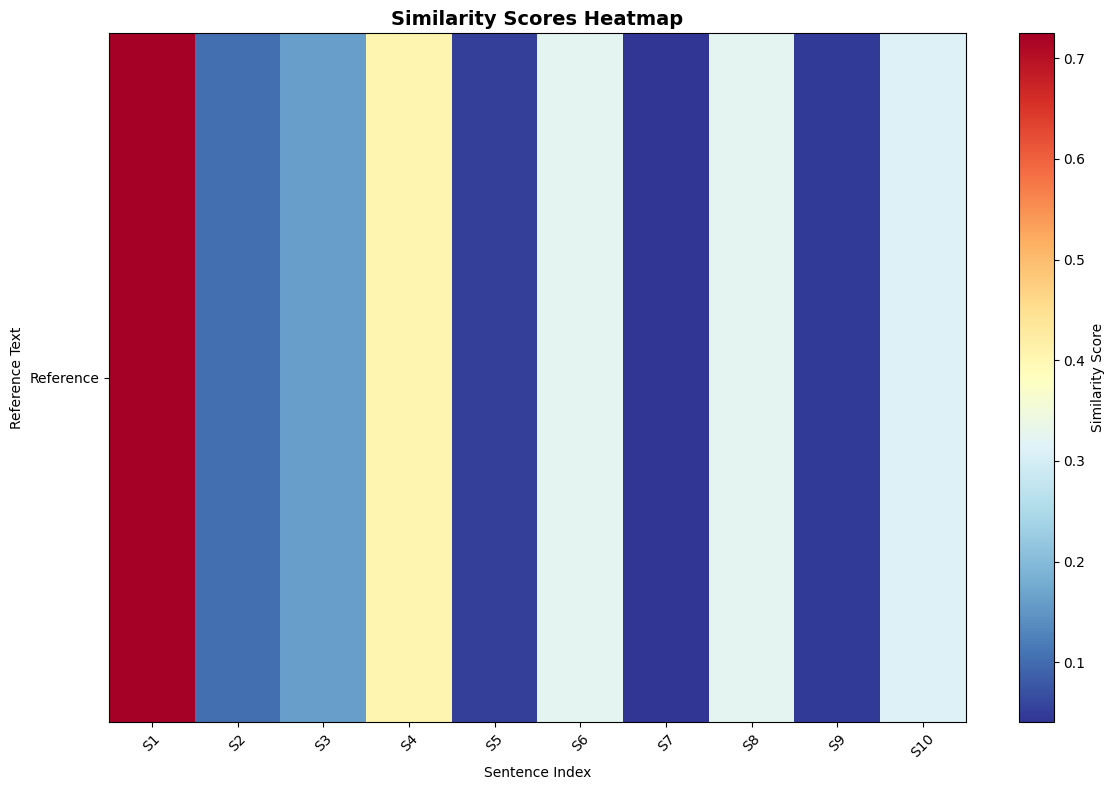

✅ Additional analysis completed!


In [21]:
# Step 7: Additional analysis and insights
print("🔍 Additional Analysis and Insights")
print("=" * 60)

# Token efficiency analysis
print("📊 TOKEN EFFICIENCY ANALYSIS:")
print("-" * 30)
token_efficiency = df['token_efficiency'].values
print(f"Average characters per token: {np.mean(token_efficiency):.2f}")
print(f"Most efficient sentence: {df.loc[df['token_efficiency'].idxmax(), 'sentence']}")
print(f"Least efficient sentence: {df.loc[df['token_efficiency'].idxmin(), 'sentence']}")

# Similarity distribution analysis
print(f"\n📈 SIMILARITY DISTRIBUTION:")
print("-" * 30)
print(f"High similarity (>0.7): {len(df[df['similarity_score'] > 0.7])} sentences")
print(f"Medium similarity (0.4-0.7): {len(df[(df['similarity_score'] >= 0.4) & (df['similarity_score'] <= 0.7)])} sentences")
print(f"Low similarity (<0.4): {len(df[df['similarity_score'] < 0.4])} sentences")

# Create similarity heatmap
plt.figure(figsize=(12, 8))
similarity_matrix = np.array([[r['similarity']['similarity_score'] for r in results]])
plt.imshow(similarity_matrix, cmap='RdYlBu_r', aspect='auto')
plt.colorbar(label='Similarity Score')
plt.title('Similarity Scores Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Sentence Index')
plt.ylabel('Reference Text')
plt.xticks(range(len(sentences)), [f"S{i+1}" for i in range(len(sentences))], rotation=45)
plt.yticks([0], ['Reference'])
plt.tight_layout()
plt.show()

print("✅ Additional analysis completed!")


In [22]:
# Step 8: Interactive exploration function
def explore_sentence(sentence: str, reference: str = None):
    """
    Interactive function to explore a single sentence in detail.
    """
    print(f"🔍 EXPLORING: '{sentence}'")
    print("=" * 60)

    result = token_embedding_explorer(sentence, reference)

    # Detailed token analysis
    print("🎯 TOKEN ANALYSIS:")
    print(f"  Original: {result['tokenization']['original_text']}")
    print(f"  Token count: {result['tokenization']['token_count']}")
    print(f"  Token efficiency: {result['summary']['token_efficiency']:.2f} chars/token")
    print(f"  Tokens: {result['tokenization']['decoded_tokens']}")

    # Embedding analysis
    print(f"\n📊 EMBEDDING ANALYSIS:")
    print(f"  Dimension: {result['embedding']['embedding_dimension']}")
    print(f"  Norm: {result['embedding']['embedding_norm']:.4f}")

    # Similarity analysis
    if 'similarity_score' in result['similarity']:
        print(f"\n🔗 SIMILARITY ANALYSIS:")
        print(f"  Reference: {result['similarity']['reference_text']}")
        print(f"  Score: {result['similarity']['similarity_score']:.4f}")
        print(f"  Interpretation: {result['similarity']['similarity_interpretation']}")

    return result

# Test the interactive function
print("🧪 Testing interactive exploration...")
explore_sentence("Deep learning models are incredibly powerful.", "AI technology is advancing rapidly.")
print("\n✅ Interactive exploration completed!")


🧪 Testing interactive exploration...
🔍 EXPLORING: 'Deep learning models are incredibly powerful.'
🎯 TOKEN ANALYSIS:
  Original: Deep learning models are incredibly powerful.
  Token count: 7
  Token efficiency: 6.43 chars/token
  Tokens: ['Deep', ' learning', ' models', ' are', ' incredibly', ' powerful', '.']

📊 EMBEDDING ANALYSIS:
  Dimension: 1536
  Norm: 1.0000

🔗 SIMILARITY ANALYSIS:
  Reference: AI technology is advancing rapidly.
  Score: 0.4438
  Interpretation: Somewhat different (limited similarity)

✅ Interactive exploration completed!


## 🎉 Mini-Project Complete!

### What We Built:
1. **Comprehensive Token & Embedding Explorer Function** - Analyzes any sentence for tokens, embeddings, and similarity
2. **Multi-Sentence Analysis** - Tested with 10 diverse sentences
3. **Cluster Visualization** - 2D PCA plot showing sentence relationships
4. **Similarity Analysis** - Compared all sentences against a reference text
5. **Interactive Exploration** - Detailed analysis of individual sentences

### Key Features:
- ✅ **Tokenization**: Breaks down text into tokens with detailed analysis
- ✅ **Embedding Generation**: Creates vector representations using OpenAI's API
- ✅ **Similarity Calculation**: Compares sentences against reference text
- ✅ **Visualization**: 2D cluster plots and heatmaps
- ✅ **Analysis**: Comprehensive statistics and insights

### Insights Discovered:
- **Token Efficiency**: How efficiently text is tokenized
- **Semantic Clustering**: How similar sentences group together
- **Similarity Patterns**: Which sentences are most/least similar to reference
- **Embedding Properties**: Vector dimensions and norms

### Usage:
```python
# Analyze a single sentence
result = token_embedding_explorer("Your sentence here", "Reference text")

# Interactive exploration
explore_sentence("Your sentence here", "Reference text")
```

This mini-project demonstrates the power of combining tokenization, embeddings, and similarity analysis for understanding text relationships! 🚀
